### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

#### Loading the requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Importing the Dataset

In [2]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target
y = pd.DataFrame(y,columns=["Target"])

In [3]:
df = pd.concat([data,y],axis=1) # Concatenating the data with the target variable

#### Displaying the first and the last five rows of the dataset

In [4]:
df.head() # First 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.tail() # Last 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### Displaying the information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.shape # (Rows,Colunns)

(150, 5)

In [8]:
df.columns # Column Names in the Dataset

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Target'],
      dtype='object')

In [9]:
df.dtypes # Data types of the Attributes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Target                 int32
dtype: object

#### Displaying the Basic Statistics of the Dataset 

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Checking for Null Values in the Dataset

In [11]:
df.isnull().sum() # No missing values in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

#### Data Visualization

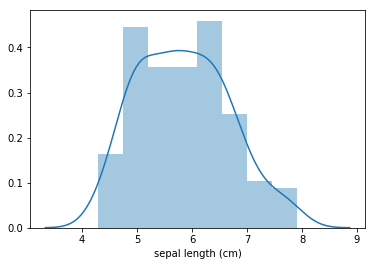

In [12]:
sns.distplot(df["sepal length (cm)"])

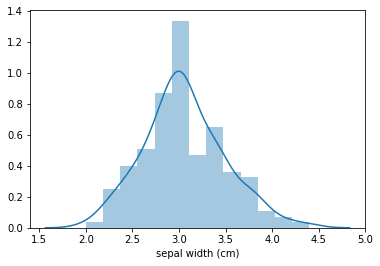

In [13]:
sns.distplot(df["sepal width (cm)"])

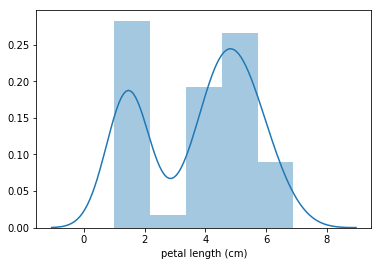

In [14]:
sns.distplot(df["petal length (cm)"])

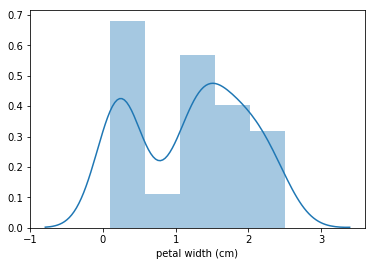

In [15]:
sns.distplot(df["petal width (cm)"])

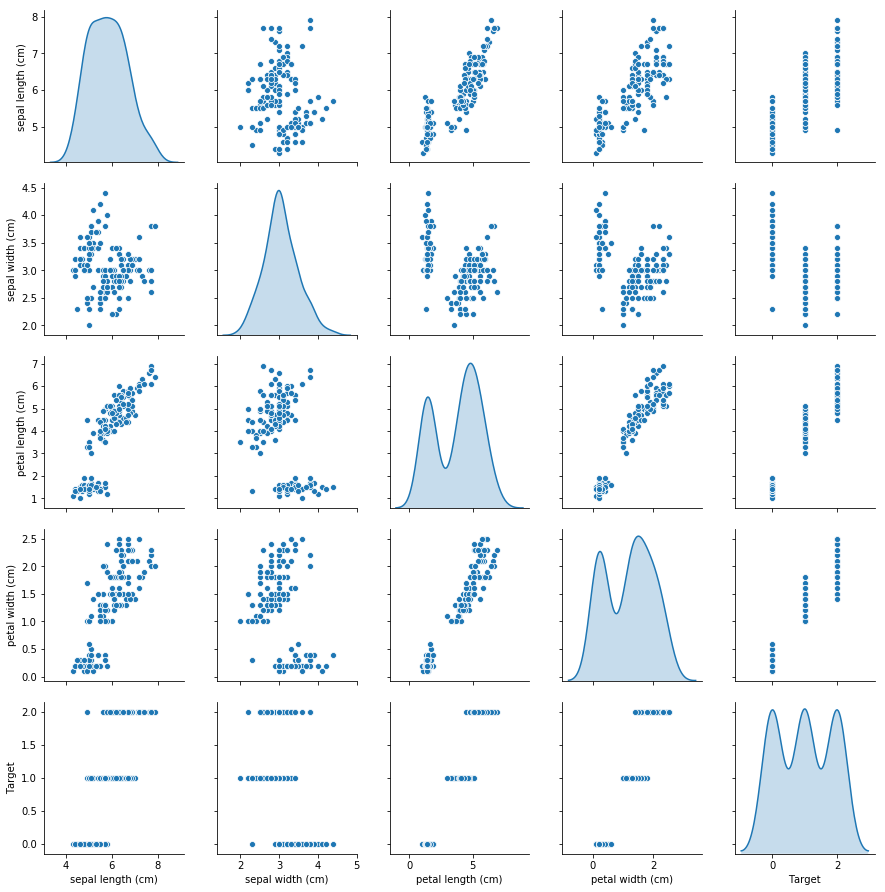

In [16]:
sns.pairplot(df,diag_kind='kde')

C:\ana\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ana\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


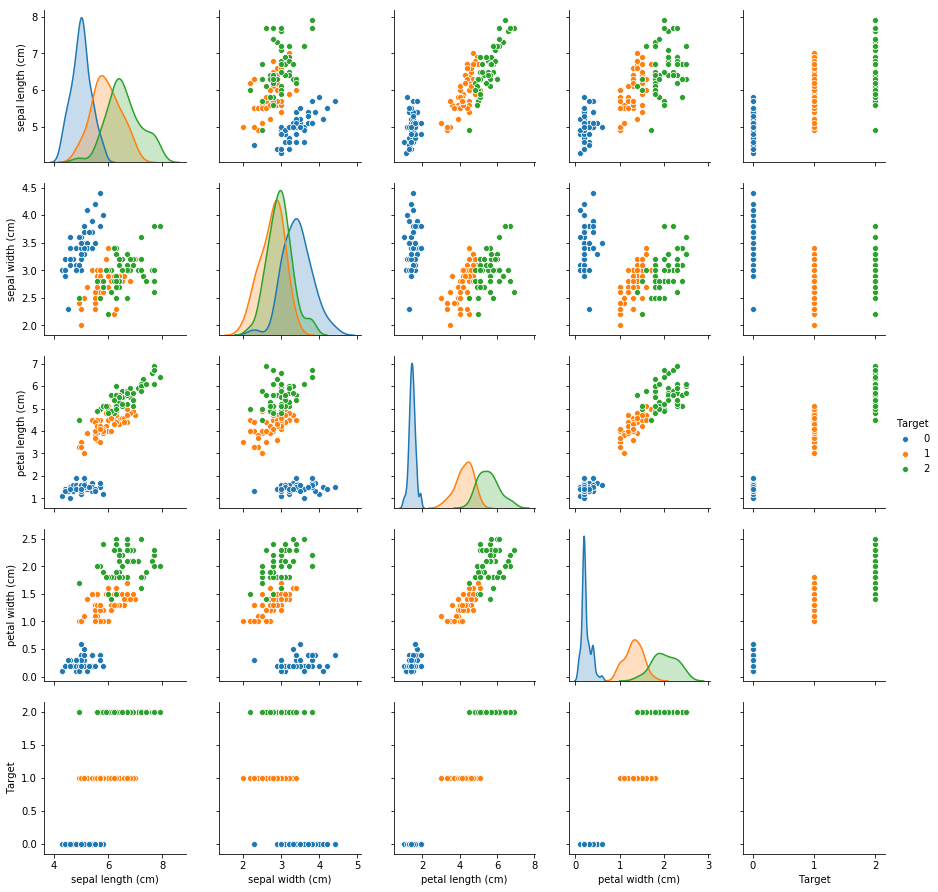

In [17]:
sns.pairplot(df,hue="Target")

<Figure size 720x576 with 0 Axes>

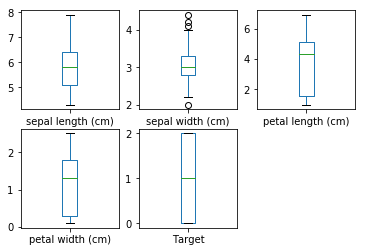

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=[10,8])
df.plot(kind="box",subplots=True,sharey=False,sharex=False,layout=(2,3))
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

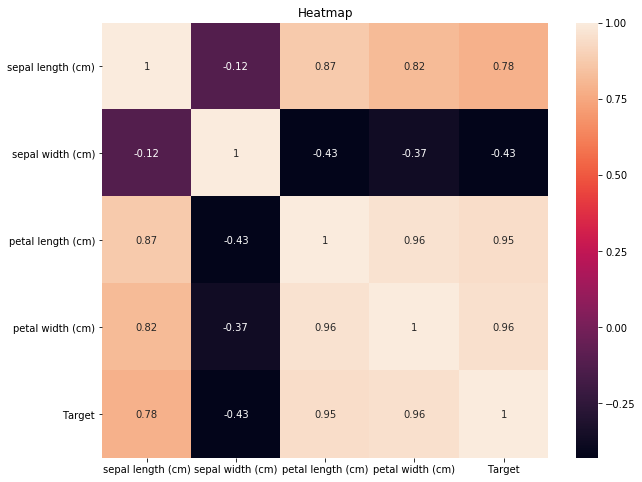

In [19]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True) # To check correlation.
plt.title("Heatmap")
plt.show()

#### Splitting data in x and y (Attributes and Labels Respectively)

In [20]:
x = df.drop("Target",axis=1)
y = df.Target

#### Performing a Train-Test Split (Splitting the data into training and testing sets)

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=123,test_size=0.2)

#### Initializing the Decision Tree Model and Fitting the Data

In [22]:
dt=DecisionTreeClassifier(random_state=123)
dt_fit = dt.fit(xtrain,ytrain)

#### Prediction of the Decision Tree Model

In [23]:
dt_predict = dt_fit.predict(xtest)

#### Evaluation of the ML Model

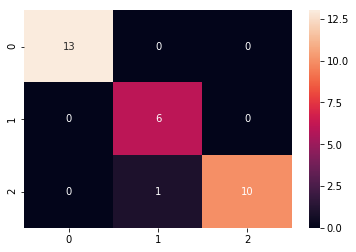

In [24]:
sns.heatmap(confusion_matrix(ytest,dt_predict),annot=True)

In [25]:
classificationreport = classification_report(ytest,dt_predict)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
accuracy = accuracy_score(ytest,dt_predict)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.9666666666666667


In [27]:
# Visualize the graph
export_graphviz(dt_fit,out_file='tree.dot',feature_names=iris.feature_names, filled=True, rounded=True,special_characters=True)

In [28]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

Error: dot: can't open #
Error: dot: can't open to
Error: dot: can't open convert
Error: dot: can't open the
Error: dot: can't open tree
Error: dot: can't open in
Error: dot: can't open a
Error: dot: can't open png
Error: dot: can't open image


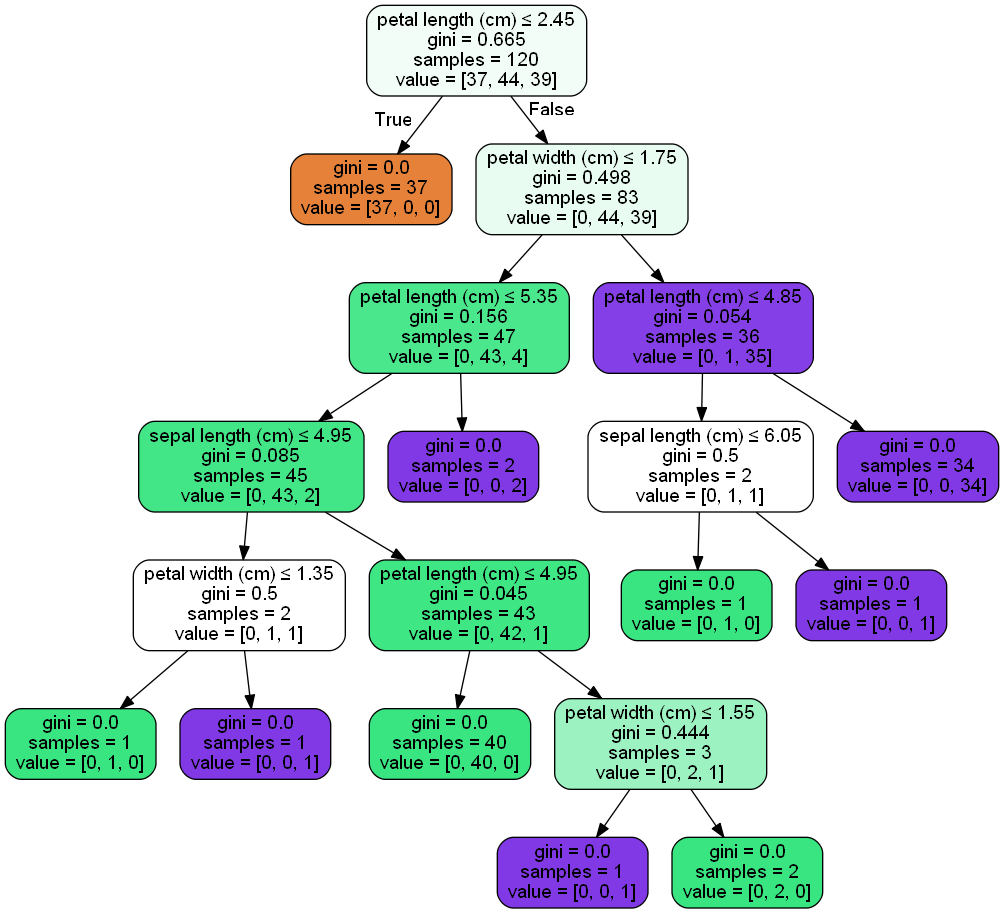

In [29]:
Image(filename='tree.png') 